## What is Exploratory Data Analysis (EDA)?

Exploratory Data Analysis (EDA) is used on the one hand to answer questions, test business assumptions, generate hypotheses for further analysis. On the other hand, you can also use it to prepare the data for modeling. The thing that these two probably have in common is a good knowledge of your data to either get the answers that you need or to develop an intuition for interpreting the results of future modeling.

There are a lot of ways to reach these goals: you can get a basic description of the data, visualize it, identify patterns in it, identify challenges of using the data, etc.

One of the things that you’ll often see when you’re reading about EDA is Data profiling. Data profiling is concerned with summarizing your dataset through descriptive statistics. You want to use a variety of measurements to better understand your dataset. The goal of data profiling is to have a solid understanding of your data so you can afterwards start querying and visualizing your data in various ways. However, this doesn’t mean that you don’t have to iterate: exactly because data profiling is concerned with summarizing your dataset, it is frequently used to assess the data quality. Depending on the result of the data profiling, you might decide to correct, discard or handle your data differently.



In [1]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load in the data with `read_csv()`
digits = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tra",
                     header=None)


In [3]:
digits.head(5)

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0,1,6,15,12,1,0,0,0,7,...,0,0,0,6,14,7,1,0,0,0
1,0,0,10,16,6,0,0,0,0,7,...,0,0,0,10,16,15,3,0,0,0
2,0,0,8,15,16,13,0,0,0,1,...,0,0,0,9,14,0,0,0,0,7
3,0,0,0,3,11,16,0,0,0,0,...,0,0,0,0,1,15,2,0,0,4
4,0,0,5,14,4,0,0,0,0,0,...,0,0,0,4,12,14,7,0,0,6


In [4]:
digits.shape

(3823, 65)

Note that in this case, you made use of read_csv() because the data happens to be in a comma-separated format. If you have files that have another separator, you can also consider using other functions to load in your data, such as read_table(), read_excel(), read_fwf() and read_clipboard, to read in general delimited files, Excel files, Fixed-Width Formatted data and data that was copied to the Clipboard, respectively.

Also, you’ll find read_sql() as one of the options to read in an SQL query or a database table into a DataFrame. 

In [5]:
# save load_iris() sklearn dataset to iris
# if you'd like to check dataset type use: type(load_iris())
# if you'd like to view list of attributes use: dir(load_iris())
iris = load_iris()

# np.c_ is the numpy concatenate function
# which is used to concat iris['data'] and iris['target'] arrays 
# for pandas column argument: concat iris['feature_names'] list
# and string list (in this case one string); you can make this anything you'd like..  
# the original dataset would probably call this ['Species']
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [6]:
iris_df.head(15)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
5,5.4,3.9,1.7,0.4,0.0
6,4.6,3.4,1.4,0.3,0.0
7,5.0,3.4,1.5,0.2,0.0
8,4.4,2.9,1.4,0.2,0.0
9,4.9,3.1,1.5,0.1,0.0


In [7]:
iris_df['target'].value_counts()

2.0    50
1.0    50
0.0    50
Name: target, dtype: int64

In [8]:
iris_df['petal width (cm)'].value_counts()

0.2    29
1.3    13
1.5    12
1.8    12
1.4     8
2.3     8
1.0     7
0.3     7
0.4     7
2.0     6
2.1     6
0.1     5
1.2     5
1.9     5
1.6     4
2.5     3
2.2     3
2.4     3
1.1     3
1.7     2
0.6     1
0.5     1
Name: petal width (cm), dtype: int64

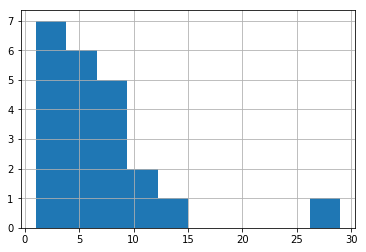

In [9]:
iris_df['petal width (cm)'].value_counts().hist()

In [10]:
iris_df['target'].value_counts()

2.0    50
1.0    50
0.0    50
Name: target, dtype: int64

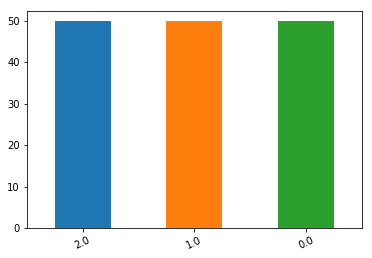

In [11]:
iris_df['target'].value_counts().plot(kind='bar')
plt.xticks(rotation=25)
plt.show()

In [12]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


You see that this function returns the count, mean, standard deviation, minimum and maximum values and the quantiles of the data. Note that, of course, there are many packages available in Python that can give you those statistics, including Pandas itself. Using this function is just one of the ways to get this information.

Also note that you certainly need to take the time to dive deeper into the descriptive statistics if you haven’t done this yet. You can use these descriptive statistics to begin to assess the quality of your data. Then you’ll be able to decide whether you need to correct, discard or deal with the data in anohter way. This is usually the data profiling step. This step in the EDA is meant to understand the data elements and its anomalies a bit better.

## First and Last DataFrame Rows


Now that you have got a general idea about your data set, it’s also a good idea to take a closer look at the data itself. With the help of the head() and tail() functions of the Pandas library, you can easily check out the first and last lines of your DataFrame, respectively.

In [13]:
iris_df.tail(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0
149,5.9,3.0,5.1,1.8,2.0


## Sampling The Data


If you have a large dataset, you might consider taking a sample of your data as an easy way to get a feel for your data quickly. As a first and easy way to do this, you can make use of the sample() function that is included in Pandas, just like this:

In [14]:
iris_df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
107,7.3,2.9,6.3,1.8,2.0
55,5.7,2.8,4.5,1.3,1.0
38,4.4,3.0,1.3,0.2,0.0
89,5.5,2.5,4.0,1.3,1.0
125,7.2,3.2,6.0,1.8,2.0


## A Closer Look At Your Data: Queries

Now that you have taken a quick look at your data and have seen what it’s about, you’re ready to dive a little bit deeper: it’s time to inspect the data further by querying the data.

This goes easily with the query() function, which allows you to test some very simple hypotheses that you have about your data, such as “Is the petal length usually greater than the sepal length?” or “Is the petal length sometimes equal to the sepal length?”.

In [15]:
iris_df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [16]:
iris_df = iris_df.rename(columns={"sepal length (cm)": "sepal_length", "sepal width (cm)": "sepal_width",
                       "petal length (cm)": "petal_length", "petal width (cm)": "petal_width",
                       "target": "class"})

In [17]:
iris_df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'], dtype='object')

In [18]:
# Petal length greater than sepal length?
iris_df.query('petal_length > sepal_length')

,sepal_length,sepal_width,petal_length,petal_width,class


In [19]:
# Petal length equals sepal length?
iris_df.query('petal_length == sepal_length')

,sepal_length,sepal_width,petal_length,petal_width,class


You’ll see that this hypothesis doesn’t hold. You get an empty DataFrame back as a result.

Note that this function can also be expressed as iris[iris.Petal_length > iris.Sepal_length]

## The Challenges of Your Data

### Missing Values
Something that you also might want to check when you’re exploring your data is whether or not the data set has any missing values.

Examining this is important because when some of your data is missing, the data set can lose expressiveness, which can lead to weak or biased analyses. Practically, this means that when you’re missing values for certain features, the chances of your classification or predictions for the data being off only increase.

In [20]:
iris_df.isnull()

,sepal_length,sepal_width,petal_length,petal_width,class
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


In [21]:
for col in iris_df.columns:
    print(col, " : ", sum(iris_df[col].isnull()))

sepal_length  :  0
sepal_width  :  0
petal_length  :  0
petal_width  :  0
class  :  0


To identify the rows that contain missing values, you can use isnull(). In the result that you’ll get back, you’ll see True or False appearing in each cell: True will indicate that the value contained within the cell is a missing value, False means that the cell contains a ‘normal’ value.

### How to handle missing data

You can delete the missing data: you either delete the whole record or you can just keep the records in which the features of interest are still present. Of course, you have to be careful with this procedure, as deleting data might also bias your analysis. That’s why you should ask yourself the question of whether the probability of certain data that is missing for a record is the same as for all other records. If the probability doesn’t vary record-per-record, deleting the missing data is a valid option.

Besides deletion, there are also methods that you can use to fill up cells if they contain missing values with so-called “imputation methods”. If you already have a lot of experience with statistics, you’ll know that imputation is the process of replacing missing data with substituted values. You can either fill in the mean, the mode or the median. Of course, here you need to think about whether you want to take, for example, the mean or median for all missing values of a variable, or whether you want to replace the missing values based on another variable. For example, for data in which you have records that have features with categorical variables such as “male” or “female”, you might also want to consider those before replacing the missing values, as the observations might differ from males and females. If this is the case, you might just calculate the average of the female observations and then fill out the missing values for other “female” records with this average.

### Filling Missing Values

In [22]:
property_df = pd.read_csv('property data.csv')

In [23]:
property_df.shape

(9, 7)

In [24]:
property_df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,1,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


In [25]:
property_df.isnull()

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,True,False,False,True,False,False
3,False,False,False,False,False,True,False
4,True,False,False,False,False,False,False
5,False,False,False,False,True,False,False
6,False,True,False,True,False,False,False
7,False,False,False,False,False,False,True
8,False,False,False,False,False,False,False


In [26]:
for col in property_df.columns:
    print(col, " : ", sum(property_df[col].isnull()))

PID  :  1
ST_NUM  :  2
ST_NAME  :  0
OWN_OCCUPIED  :  1
NUM_BEDROOMS  :  2
NUM_BATH  :  1
SQ_FT  :  1


In [27]:
# Making a list of missing value types
missing_values = ["n/a", "na", "--"]
property_df = pd.read_csv("property data.csv", na_values = missing_values)

In [28]:
for col in property_df.columns:
    print(col, " : ", sum(property_df[col].isnull()))

PID  :  1
ST_NUM  :  2
ST_NAME  :  0
OWN_OCCUPIED  :  1
NUM_BEDROOMS  :  3
NUM_BATH  :  1
SQ_FT  :  2


In [29]:
property_df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,12,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,1.0,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [30]:
int('age')

ValueError: invalid literal for int() with base 10: 'age'

In [31]:
int('12')

12

In [32]:
# Detecting numbers 
cnt=0
for row in property_df['OWN_OCCUPIED']:
    try:
        int(row)
        property_df.loc[cnt, 'OWN_OCCUPIED']=np.nan
    except ValueError:
        pass
    cnt+=1

In [33]:
property_df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,1.0,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [34]:
# Calculate the mean
mean = np.mean(property_df['SQ_FT'])


# Replace missing values with the mean
property_df['SQ_FT'].fillna(mean)

0    1000.0
1    1100.0
2     850.0
3     700.0
4    1600.0
5     800.0
6     950.0
7    1100.0
8    1800.0
Name: SQ_FT, dtype: float64

In [35]:
mean

1100.0

Pass in ffill or bfill to specify you want to fill the values backward or forward.

In [36]:
property_df['SQ_FT']

0    1000.0
1       NaN
2     850.0
3     700.0
4    1600.0
5     800.0
6     950.0
7       NaN
8    1800.0
Name: SQ_FT, dtype: float64

In [37]:
property_df['SQ_FT'].fillna(method='ffill')

0    1000.0
1    1000.0
2     850.0
3     700.0
4    1600.0
5     800.0
6     950.0
7     950.0
8    1800.0
Name: SQ_FT, dtype: float64

In [38]:
property_df['SQ_FT'].fillna(method='bfill')

0    1000.0
1     850.0
2     850.0
3     700.0
4    1600.0
5     800.0
6     950.0
7    1800.0
8    1800.0
Name: SQ_FT, dtype: float64

#### Drop Labels With Missing Values
To exclude columns or rows that contain missing values, you can make use of Pandas’ dropna() function:

In [39]:
property_df['SQ_FT'].dropna(axis=0)

0    1000.0
2     850.0
3     700.0
4    1600.0
5     800.0
6     950.0
8    1800.0
Name: SQ_FT, dtype: float64

#### Interpolation
Alternatively, you can also choose to interpolate missing values: the interpolate() function will perform a linear interpolation at the missing data points to “guess” the value that is most likely to be filled in.

In [40]:
property_df['SQ_FT'].interpolate()

0    1000.0
1     925.0
2     850.0
3     700.0
4    1600.0
5     800.0
6     950.0
7    1375.0
8    1800.0
Name: SQ_FT, dtype: float64

## Correlation

In [41]:
# Pearson correlation
iris_df.corr()

,sepal_length,sepal_width,petal_length,petal_width,class
sepal_length,1.000000,-0.117570,0.871754,0.817941,0.782561
sepal_width,-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal_length,0.871754,-0.428440,1.000000,0.962865,0.949035
petal_width,0.817941,-0.366126,0.962865,1.000000,0.956547
class,0.782561,-0.426658,0.949035,0.956547,1.000000


In [42]:
# Kendall Tau correlation
iris_df.corr('kendall')


,sepal_length,sepal_width,petal_length,petal_width,class
sepal_length,1.000000,-0.076997,0.718516,0.655309,0.670444
sepal_width,-0.076997,1.000000,-0.185994,-0.157126,-0.337614
petal_length,0.718516,-0.185994,1.000000,0.806891,0.822911
petal_width,0.655309,-0.157126,0.806891,1.000000,0.839687
class,0.670444,-0.337614,0.822911,0.839687,1.000000


In [43]:
# Spearman Rank correlation
iris_df.corr('spearman')

,sepal_length,sepal_width,petal_length,petal_width,class
sepal_length,1.000000,-0.166778,0.881898,0.834289,0.798078
sepal_width,-0.166778,1.000000,-0.309635,-0.289032,-0.440290
petal_length,0.881898,-0.309635,1.000000,0.937667,0.935431
petal_width,0.834289,-0.289032,0.937667,1.000000,0.938179
class,0.798078,-0.440290,0.935431,0.938179,1.000000


In [44]:

corr = iris_df.corr()
corr.style.background_gradient(cmap='Wistia')
# 'RdBu_r' & 'BrBG' are other good diverging colormaps

,sepal_length,sepal_width,petal_length,petal_width,class
sepal_length,1,-0.11757,0.871754,0.817941,0.782561
sepal_width,-0.11757,1,-0.42844,-0.366126,-0.426658
petal_length,0.871754,-0.42844,1,0.962865,0.949035
petal_width,0.817941,-0.366126,0.962865,1,0.956547
class,0.782561,-0.426658,0.949035,0.956547,1


## pandas-profiling 
Git:  https://github.com/pandas-profiling/pandas-profiling

Meteorites example: Source of data: https://data.nasa.gov/Space-Science/Meteorite-Landings/gh4g-9sfh

Generates profile reports from a pandas DataFrame. The pandas df.describe() function is great but a little basic for serious exploratory data analysis.

For each column the following statistics - if relevant for the column type - are presented in an interactive HTML report:

- Essentials: type, unique values, missing values
- Quantile statistics like minimum value, Q1, median, Q3, maximum, range, interquartile range
- Descriptive statistics like mean, mode, standard deviation, sum, median absolute deviation, coefficient of variation, kurtosis, skewness
- Most frequent values
- Histogram
- Correlations highlighting of highly correlated variables, Spearman and Pearson matrixes


In [45]:
import pandas_profiling

In [46]:
df=pd.read_csv("Meteorite_Landings.csv", parse_dates=['year'], encoding='UTF-8')

# Note: Pandas does not support dates before 1880, so we ignore these for this analysis
df['year'] = pd.to_datetime(df['year'], errors='coerce')

# Example: Constant variable
df['source'] = "NASA"

# Example: Boolean variable
df['boolean'] = np.random.choice([True, False], df.shape[0])

# Example: Mixed with base types
df['mixed'] = np.random.choice([1, "A"], df.shape[0])

# Example: Highly correlated variables
df['reclat_city'] = df['reclat'] + np.random.normal(scale=5,size=(len(df)))

# Example: Duplicate observations
duplicates_to_add = pd.DataFrame(df.iloc[0:10])
duplicates_to_add['name'] = duplicates_to_add['name'] + " copy"

df = df.append(duplicates_to_add, ignore_index=True)

In [47]:
df.shape

(45726, 14)

In [48]:
df.head(5)

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation,source,boolean,mixed,reclat_city
0,Aachen,1,Valid,L5,21,Fell,1880-01-01,50.77500,6.08333,"(50.775000, 6.083330)",NASA,False,1,57.506344
1,Aarhus,2,Valid,H6,720,Fell,1951-01-01,56.18333,10.23333,"(56.183330, 10.233330)",NASA,False,A,54.439502
2,Abee,6,Valid,EH4,"107,000",Fell,1952-01-01,54.21667,-113.00000,"(54.216670, -113.000000)",NASA,True,A,54.909801
3,Acapulco,10,Valid,Acapulcoite,"1,914",Fell,1976-01-01,16.88333,-99.90000,"(16.883330, -99.900000)",NASA,True,A,20.385186
4,Achiras,370,Valid,L6,780,Fell,1902-01-01,-33.16667,-64.95000,"(-33.166670, -64.950000)",NASA,False,1,-33.905235


In [49]:
df.tail(5)

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation,source,boolean,mixed,reclat_city
45721,Adhi Kot copy,379,Valid,EH4,"4,239",Fell,1919-01-01,32.10000,71.80000,"(32.100000, 71.800000)",NASA,False,A,38.440013
45722,Adzhi-Bogdo (stone) copy,390,Valid,LL3-6,910,Fell,1949-01-01,44.83333,95.16667,"(44.833330, 95.166670)",NASA,True,1,42.814220
45723,Agen copy,392,Valid,H5,"30,000",Fell,1814-01-01,44.21667,0.61667,"(44.216670, 0.616670)",NASA,True,A,44.916553
45724,Aguada copy,398,Valid,L6,"1,620",Fell,1930-01-01,-31.60000,-65.23333,"(-31.600000, -65.233330)",NASA,False,A,-37.732138
45725,Aguila Blanca copy,417,Valid,L,"1,440",Fell,1920-01-01,-30.86667,-64.55000,"(-30.866670, -64.550000)",NASA,True,1,-32.028508


In [50]:
df['boolean'].value_counts()

False    23119
True     22607
Name: boolean, dtype: int64

The types supported are split in standard types and special types.
- Standard types:
        * Categorical (`TYPE_CAT`): the default type if no other one can be determined
        * Numerical (`TYPE_NUM`): if it contains numbers
        * Boolean (`TYPE_BOOL`): at this time only detected if it contains boolean values, see todo
        * Date (`TYPE_DATE`): if it contains datetime
- Special types:
        * Constant (`S_TYPE_CONST`): if all values in the variable are equal
        * Unique (`S_TYPE_UNIQUE`): if all values in the variable are different
        * Unsupported (`S_TYPE_UNSUPPORTED`): if the variable is unsupported

### Inline report without saving object

In [51]:
pandas_profiling.ProfileReport(df)

Number of variables,14
Number of observations,45726
Total Missing (%),3.5%
Total size in memory,4.6 MiB
Average record size in memory,105.0 B
Numeric,3
Categorical,6
Boolean,1
Date,1
Text (Unique),1
Rejected,2


### Save report to file

In [52]:
pfr = pandas_profiling.ProfileReport(df)
pfr.to_file("example.html")

#### Print existing ProfileReport object inline

In [53]:
pfr

Number of variables,14
Number of observations,45726
Total Missing (%),3.5%
Total size in memory,4.6 MiB
Average record size in memory,105.0 B
Numeric,3
Categorical,6
Boolean,1
Date,1
Text (Unique),1
Rejected,2


### Mask Analysis custom function

The mask analysis or string pattern is useful for fields like city, postal code, phone, etc. It shows us how the fields have been populated and we can infer some data quality issues.

Rules:

- lower case letter returns 'l'
- Capital case letter returns 'L'
- Number returns 'D'
- Space returns 's'
- Special character returns itself
- Missing value returns '-null-'

- Examples:
    - 'Van' returns 'Lll'
    - 'VAN' returns 'LLL'
    - 'Van BC' returns 'LllsLL'
    - '+1 123-1234-5555 returns '+DsDDD-DDDD-DDDD'

The standard for the Canadian Postal Code should be 'LDLsDLD'

In [59]:
# Read the data set
df = pd.read_csv('2017business_licences.csv')


In [60]:
def mask_profile(series):
    '''
    Make a mask profile of a field by converting the ascii value of the character as below.
    a to z --> returns "l" for letter
    A to Z --> returns "L" for Letter
    0 to 9 --> returns "D" for Digit
    'space' --> returns "s" for space
    Special characters --> keep original
    Requirement: pandas
    Input: pandas Series
    '''    
    def getMask(field):
        mask = ''
        if str(field) == 'nan':
            mask = '-null-'
        else:    
            for character in str(field):
                if 65 <= ord(character) <= 90: # ascii 65 to 90 are Capital letters
                    mask = mask + 'L'                
                elif 97 <= ord(character) <= 122: #ascii 97 to 122 are lower case letters
                    mask = mask + 'l'
                elif 48 <= ord(character) <= 57: #ascii 48 to 57 are digits
                    mask = mask + 'D'
                elif ord(character) == 32:
                    mask = mask + 's'
                else:
                    mask = mask + character
        return mask
    value = series.apply(getMask).value_counts()
    percentage = round(series.apply(getMask).value_counts(normalize=True)*100,2)
    result = pd.DataFrame(value)
    result['%'] = pd.DataFrame(percentage)
    result.columns = ['Count','%']
    return result

In [63]:
# Use mask_profile(pass a pandas series)
# I'm using head(10) to show only the top 10 results
mask_profile(df['PostalCode']).head(10)

,Count,%
LDLsDLD,33925,56.48
-null-,24671,41.08
LDLsDLDs,491,0.82
LDLDLD,411,0.68
s,366,0.61
LDLssDLD,78,0.13
sLDLsDLD,27,0.04
LDLsDLL,15,0.02
sLDLsDLDs,12,0.02
LLLsLLLLLL,9,0.01


In [64]:
mask_profile(df['PostalCode'])

,Count,%
LDLsDLD,33925,56.48
-null-,24671,41.08
LDLsDLDs,491,0.82
LDLDLD,411,0.68
s,366,0.61
LDLssDLD,78,0.13
sLDLsDLD,27,0.04
LDLsDLL,15,0.02
sLDLsDLDs,12,0.02
LLLsLLLLLL,9,0.01
